In [7]:
library(ggplot2) 
library(readxl)
library(tidyverse)
library(caret) 
library(corrplot)

In [8]:
ames <- read_excel('/Users/jaimerd/Desktop/master/Statistics Business/assigment 1/housingdataset.xlsx')

In [9]:
colnames(ames)

[1] "ID"              "d_type"          "zone"            "frontage"       
 [5] "lot_area"        "road"            "alley"           "shape"          
 [9] "contour"         "utilities"       "configuration"   "slope"          
[13] "neighbourhood"   "prox_1"          "prox_2"          "building"       
[17] "stories"         "house_quality"   "house_condition" "year_built"     
[21] "year_remod"      "roof_type"       "roof_material"   "exter l_1"      
[25] "exter l_2"       "veneer"          "veneer_area"     "exter l_qual"   
[29] "exter l_cond"    "foundations"     "basement_qual"   "basement_cond"  
[33] "bsmt_type_1"     "bsmt_sf1"        "bsmt_type_2"     "bsmt_sf2"       
[37] "bsmt_unf"        "bsmt_area"       "heat_type"       "heat_qual"      
[41] "aircon"          "floor1_sf"       "floor2_sf"       "low_qual_sf"    
[45] "bsmt_full_bath"  "bsmt_half_bath"  "full_bath"       "half_bath"      
[49] "bedroom"         "kitchen"         "kitchen_qual"    "rooms_tot"      
[53] "functio lity"    "fireplace"       "fireplace_qual"  "garage_loc"     
[57] "garage_year"     "garage_fin"      "garage_cars"     "garage_area"    
[61] "garage_qual"     "garage_cond"     "driveway"        "deck_sf"        
[65] "open_porch_sf"   "encl_porch_sf"   "season_porch"    "screen_porch"   
[69] "pool_sf"         "pool_qual"       "fence_qual"      "features"       
[73] "features_val"    "month_sold"      "year_sold"       "sale_type"      
[77] "sale_cond"       "sale_price"

house age and gr living sf are calculated

In [10]:
ames$house_age <- ames$year_sold - ames$year_remod 
ames$total_sf <- ames$floor1_sf + ames$floor2_sf

Create a table with 19 variables

In [11]:
data <- ames %>% select(d_type, lot_area, `exter l_qual`,
                        neighbourhood, prox_1, garage_cars, house_quality, house_condition, bsmt_area,heat_qual, total_sf, bedroom, kitchen, rooms_tot, full_bath, fireplace, garage_area,house_age, sale_price)
summary (data)

     d_type          lot_area      exter l_qual       neighbourhood     
 Min.   : 20.00   Min.   :    13   Length:2880        Length:2880       
 1st Qu.: 20.00   1st Qu.:  7441   Class :character   Class :character  
 Median : 50.00   Median :  9444   Mode  :character   Mode  :character  
 Mean   : 57.42   Mean   : 10159                                        
 3rd Qu.: 70.00   3rd Qu.: 11554                                        
 Max.   :190.00   Max.   :215245                                        
                                                                        
    prox_1           garage_cars    house_quality    house_condition
 Length:2880        Min.   :0.000   Min.   : 1.000   Min.   :1.000  
 Class :character   1st Qu.:1.000   1st Qu.: 5.000   1st Qu.:5.000  
 Mode  :character   Median :2.000   Median : 6.000   Median :5.000  
                    Mean   :1.769   Mean   : 6.097   Mean   :5.556  
                    3rd Qu.:2.000   3rd Qu.: 7.000   3rd Qu.:6.000  
  

DATA CLEANING

Convert the categorical variables into factors

In [12]:
data <- data %>% mutate_if(is.character,as.factor)

Numerical Variables - Outliers


 1470  1476  1477  1484  1488  1491  1495  1504  1526  1533  1596  1612  1680 
    1     1     2     1     1     1     1     1     2     4     2     1    18 
 1733  1782  1869  1879  1890  1894  1900  1920  1936  1950  1953  1974  2001 
    1     1     1     1     6     1     1     1     2     1     1     2     1 
 2016  2058  2104  2117  2160  2179  2205  2217  2268  2280  2289  2304  2308 
    1     1     1     4     3     1     1     1     1     7     1     1     4 
 2349  2364  2394  2403  2448  2500  2522  2529  2544  2572  2592  2628  2645 
    1     2     1     1     2     1     4     1     4     1     1     1     3 
 2651  2665  2760  2880  2887  2938  2980  2998  3000  3010  3013  3068  3072 
    1     4     1     1     1     1     1     2     2     2     1     1     2 
 3087  3136  3153  3180  3182  3196  3203  3215  3230  3242  3300  3316  3363 
    1     1     1     4     8     2     1     1     2     1     1     1     1 
 3378  3435  3480  3500  3515  3523  3600  3604  36

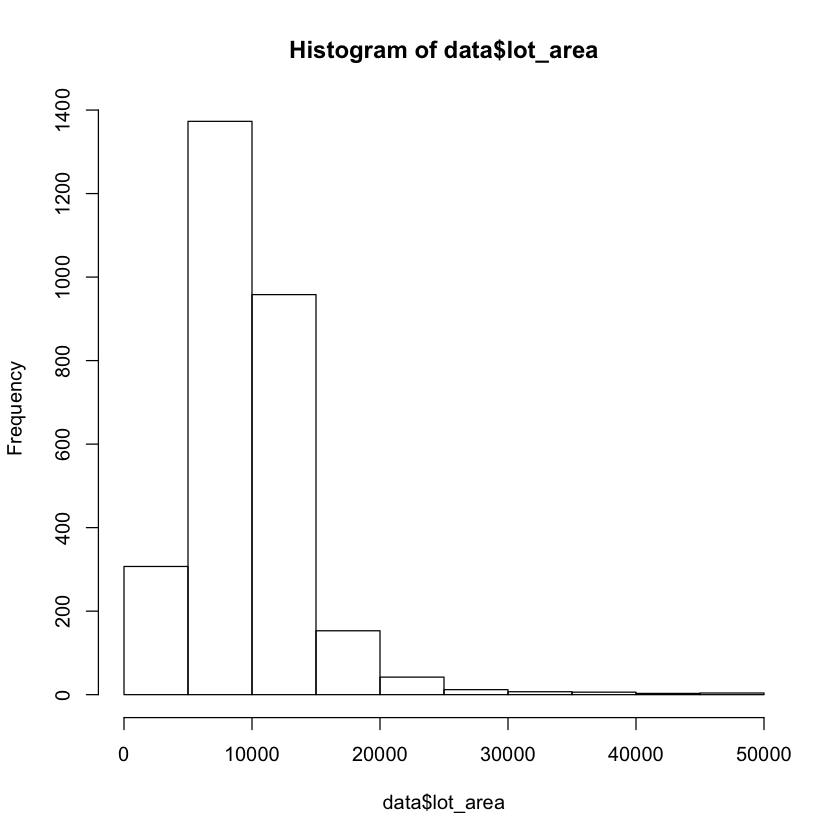

lot_area > 50000,n
FALSE,2865
NA,15


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1470    7436    9400    9788   11492   47280      15 

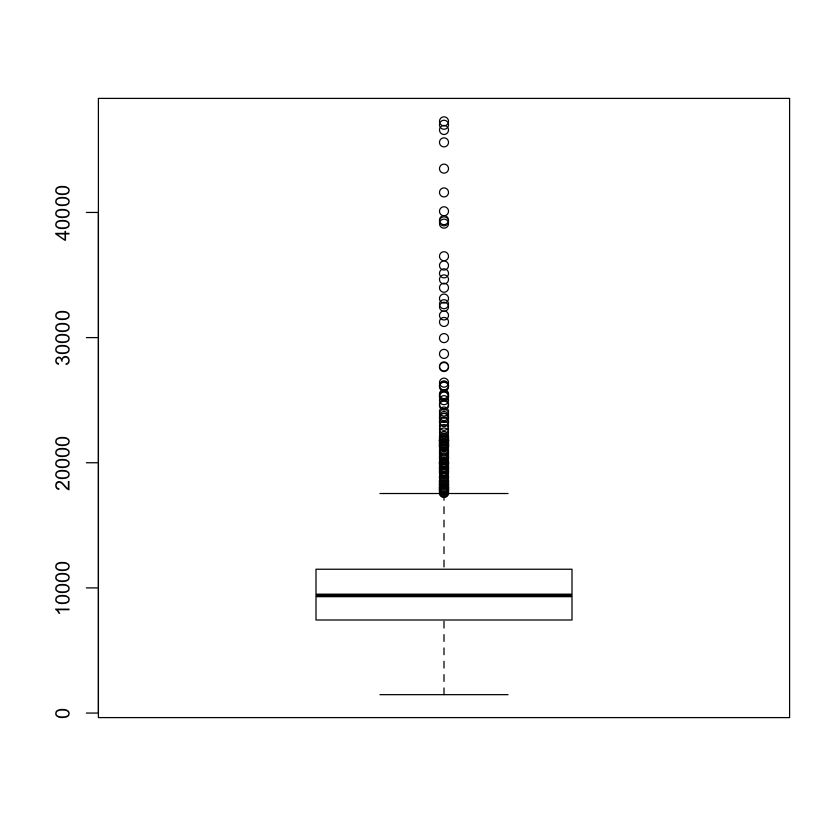

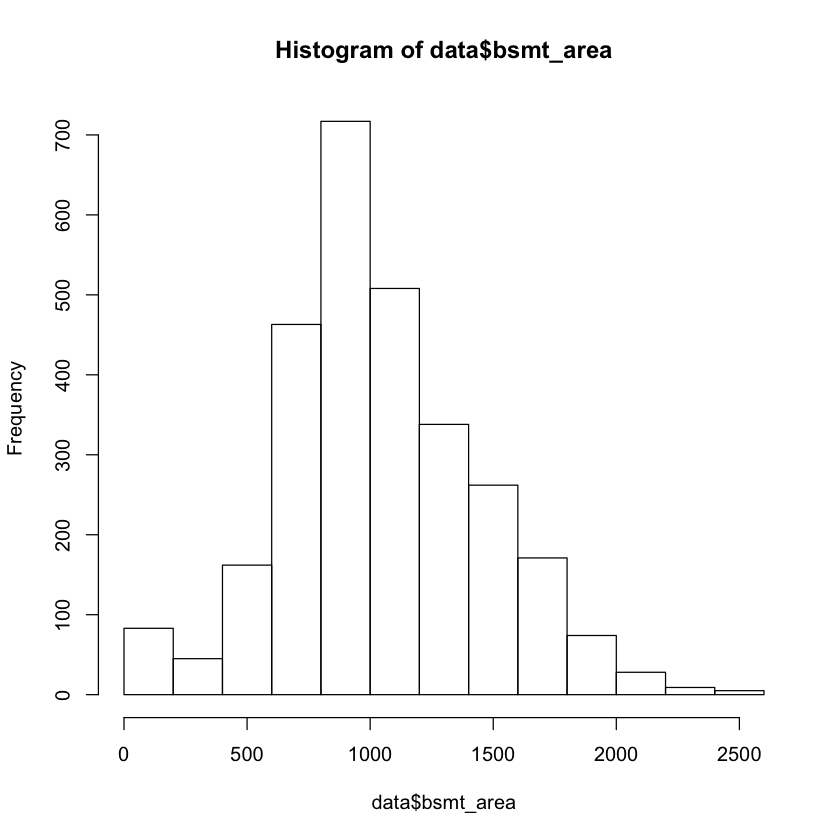

bsmt_area > 2470,n
FALSE,2865
NA,15


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0     792     988    1041    1296    2461      15 


   0  105  160  173  190  192  216  240  245  264  270  279  290  297  301  319 
  78    1    1    1    1    1    2    1    1    4    1    1    1    1    1    1 
 346  348  352  360  370  372  381  384  385  392  396  405  407  408  409  416 
   2    1    1    1    1    1    1   19    1    2    1    1    1    1    1    2 
 420  423  432  440  448  450  451  456  458  462  468  480  481  482  483  484 
   1    1    1    3    2    1    1    2    1    2    1    2    1    1   14    1 
 485  492  494  498  502  504  506  516  520  525  526  528  530  531  533  536 
   1    1    1    1    1    2    1    3    5    5    1    4    4    1    2    2 
 539  540  544  546  547  550  551  552  554  559  560  561  565  569  570  572 
   1    2    1   16    5    1    1    1    1    1    5    3    1    1    3    7 
 576  583  585  588  592  596  600  602  608  610  611  612  616  617  621  622 
   4    1    6    4    2    3   16    1    5    1    1    3    6    1    1    1 
 624  625  626  628  629  6

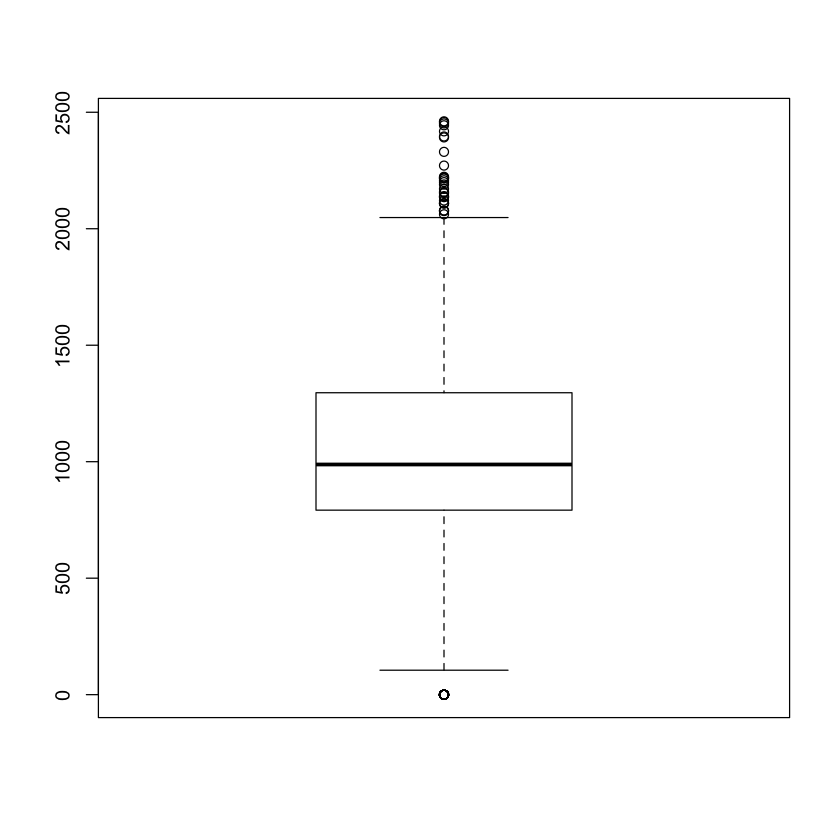

total_sf > 3200,n
FALSE,2864
NA,16


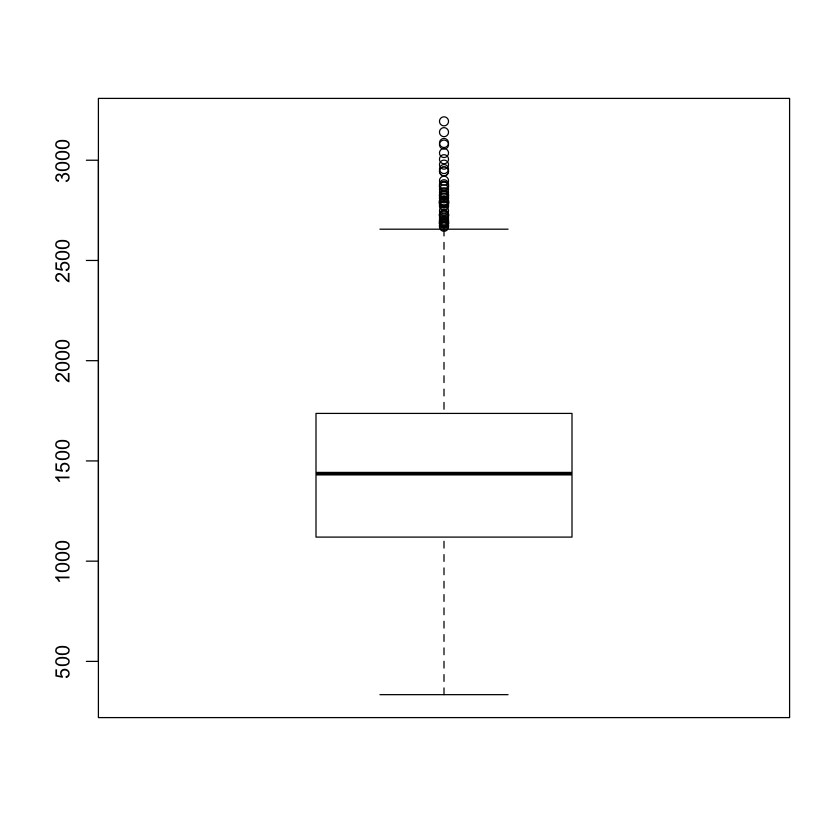

garage_area > 1100,n
FALSE,2861
NA,19


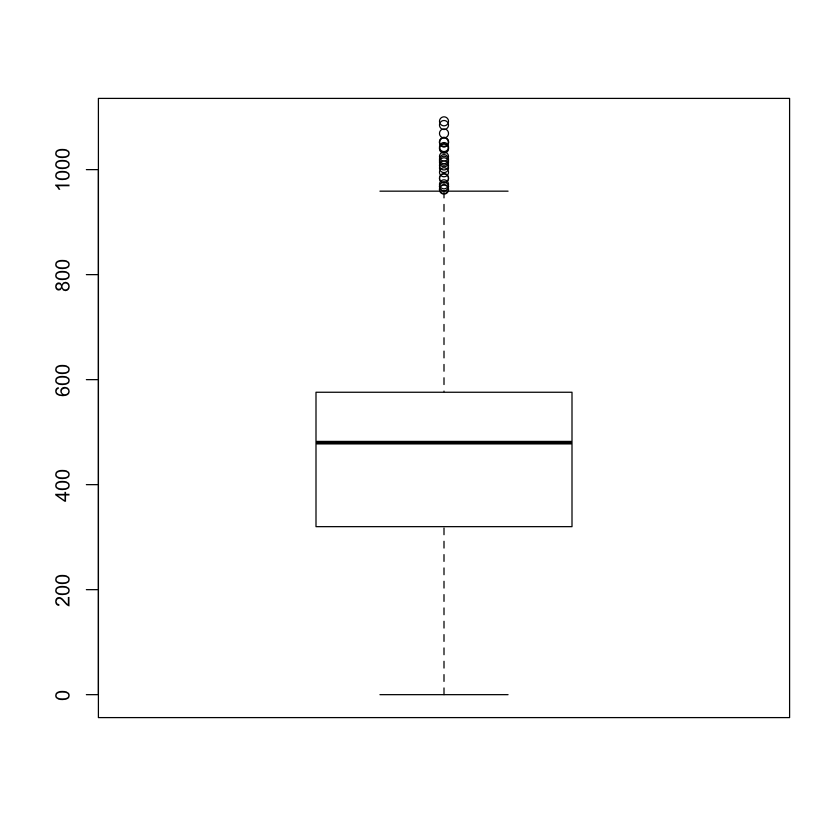

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    4.00   15.00   23.54   43.00   60.00       3 

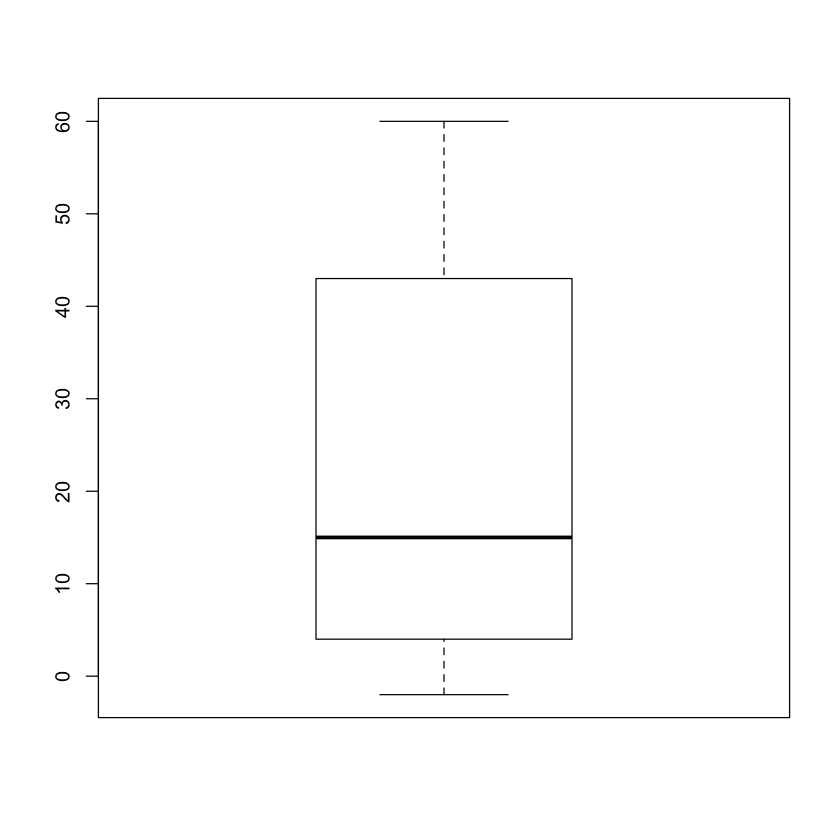

sale_price > 601000,n
FALSE,2865
TRUE,15


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  14452  146335  180800  201929  240690  567076      15 

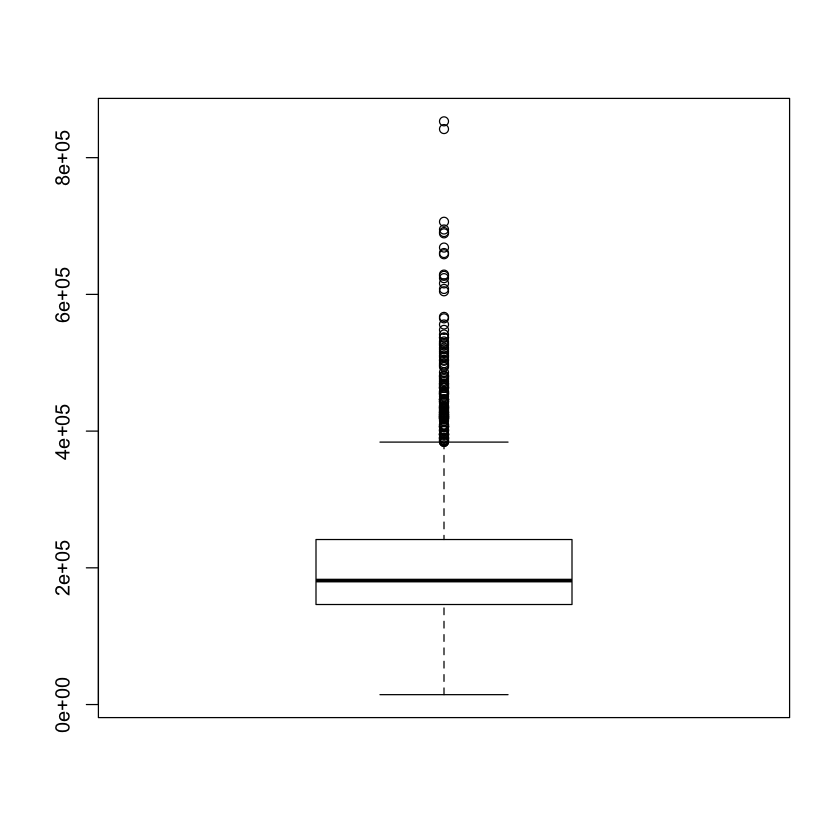

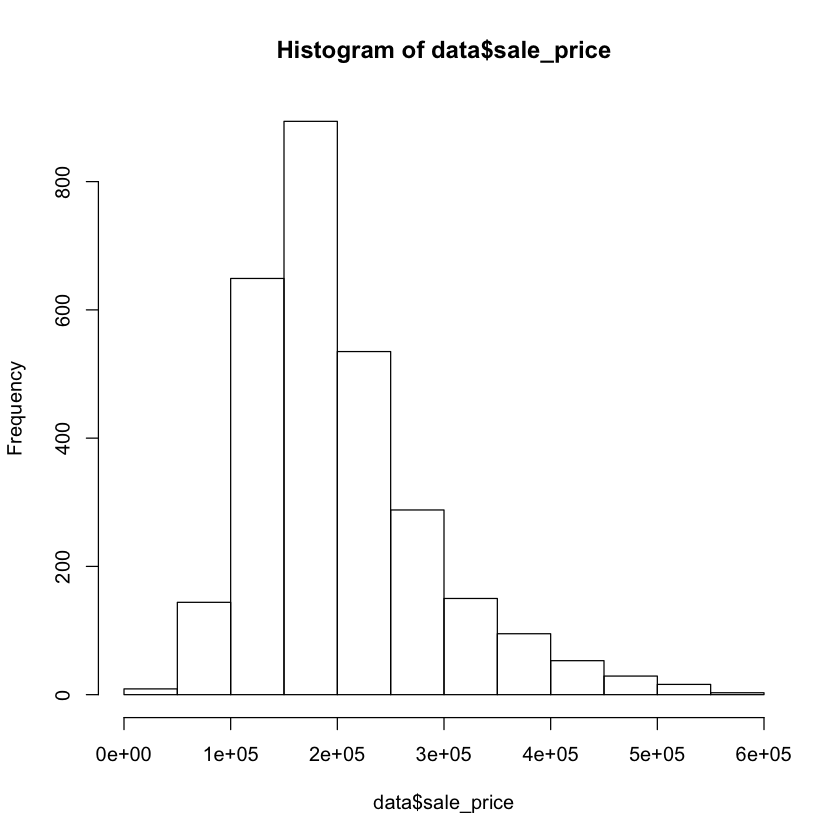


   0    1    2    3    4    5    6    8 
   7  111  728 1572  393   47   21    1 

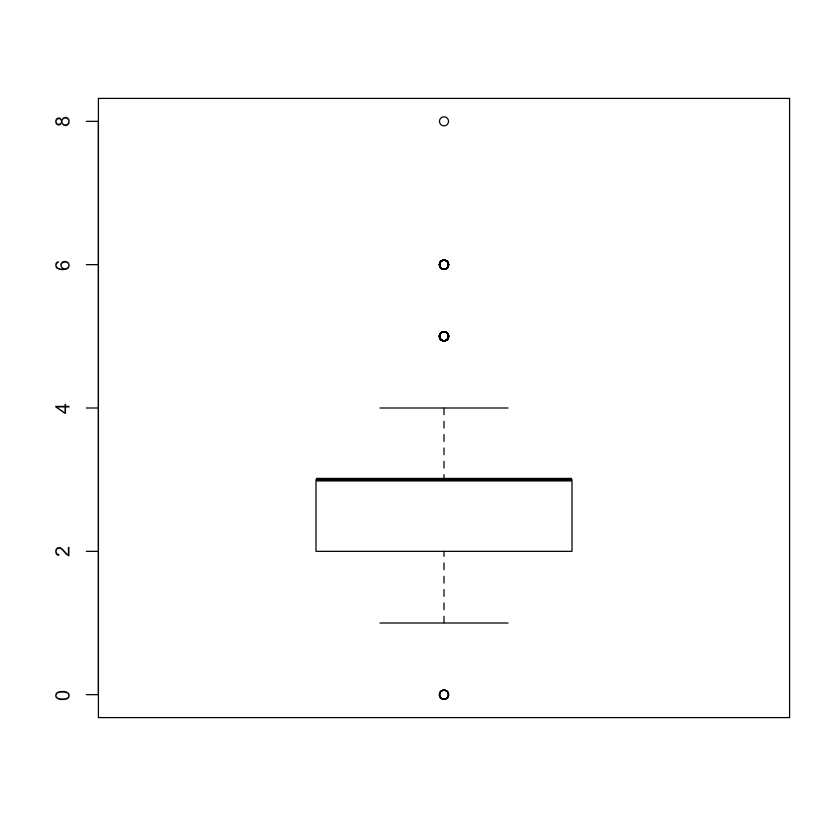


   0    1    2    3 
   3 2747  128    2 

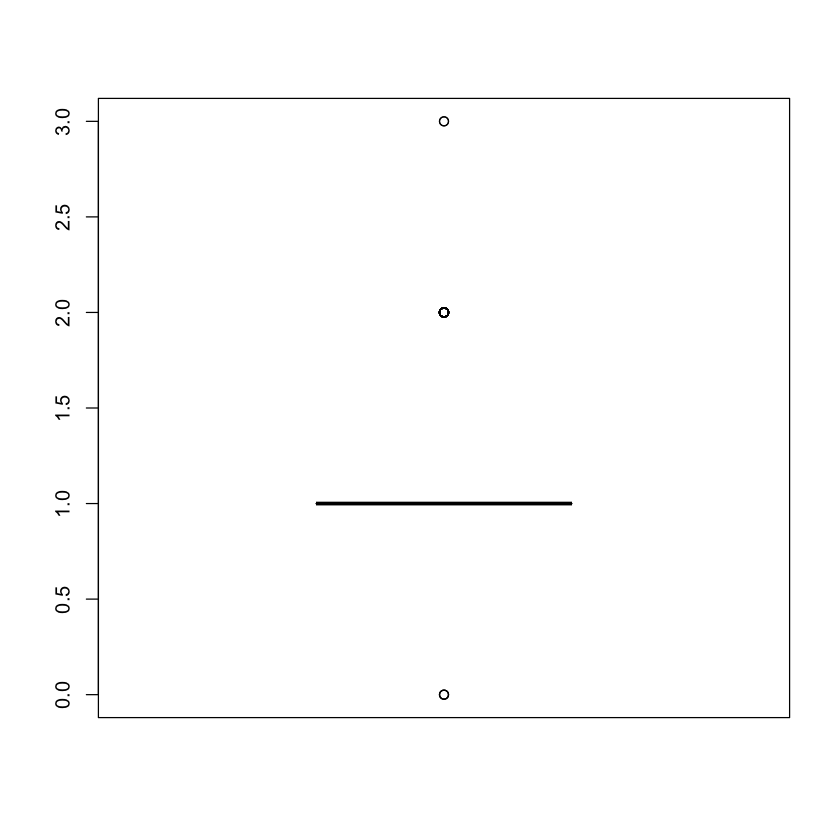


   0    1    2    3    4 
  11 1292 1510   63    4 

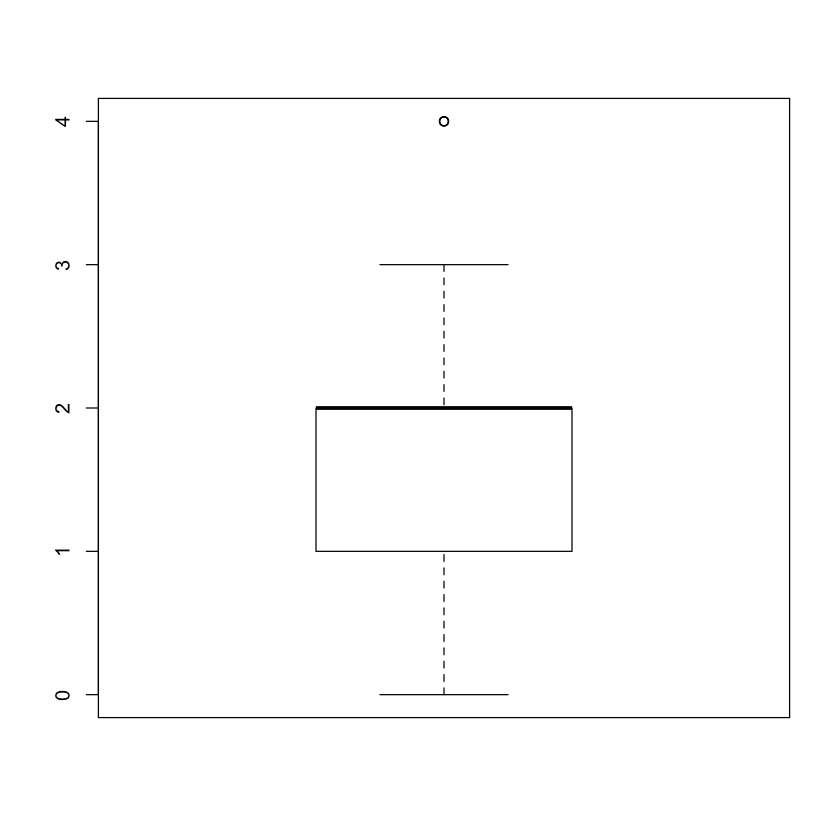


   0    1    2    3    4 
1392 1257  218   12    1 


Blmngtn Blueste  BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert  Greens 
     28      10      29     106      42     263     103     190     163       8 
GrnHill  IDOTRR Landmrk MeadowV Mitchel   NAmes NPkVill  NWAmes NoRidge NridgHt 
      2      90       1      37     113     433      22     128      71     163 
OldTown   SWISU  Sawyer SawyerW Somerst StoneBr  Timber Veenker 
    237      48     148     124     176      50      72      23 

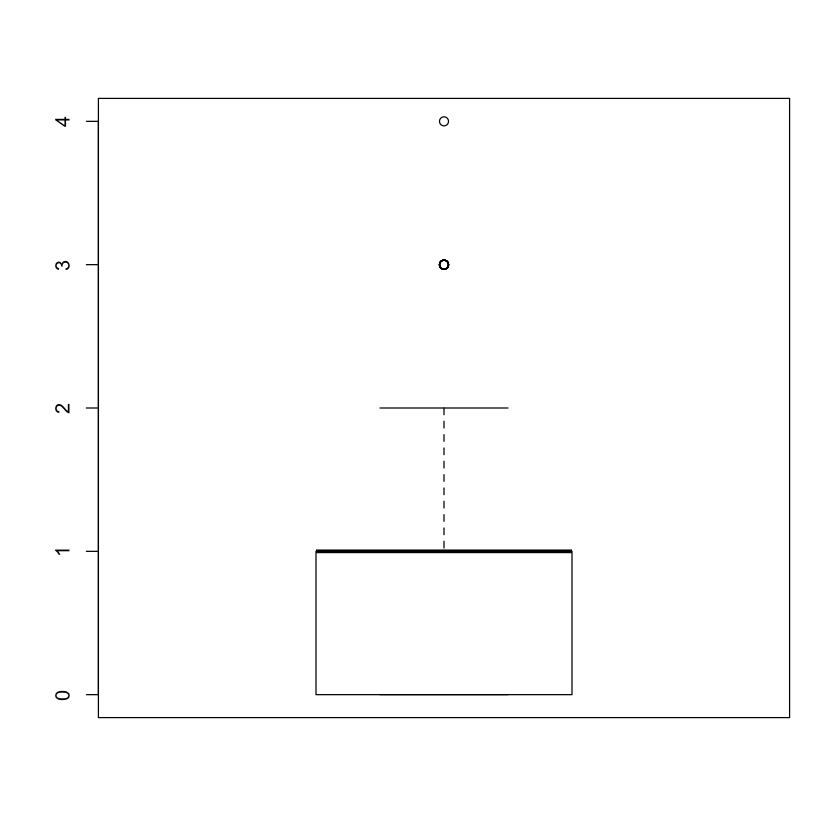


   0    1    2    3    4    5 
 154  759 1582  367   16    1 

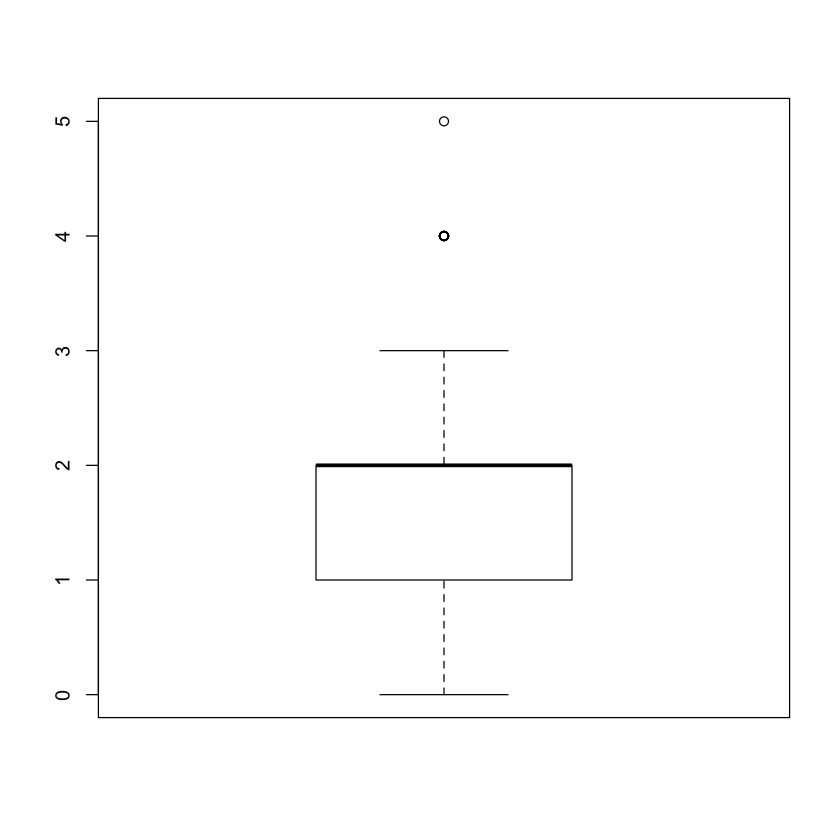

In [18]:
#LOT_AREA
hist(data$lot_area)
table(data$lot_area)
boxplot(data$lot_area)
data %>% count(lot_area>50000) 
data$lot_area[data$lot_area > 50000] <- NA 
data$lot_area[data$lot_area < 20] <- NA 
summary(data$lot_area)

#BSMT_AREA
hist(data$bsmt_area)
boxplot(data$bsmt_area)
data %>% count(bsmt_area>2470) 
data$bsmt_area[data$bsmt_area > 2470] <- NA 
summary(data$bsmt_area)
table(data$bsmt_area)

#total_sf
boxplot(data$total_sf)
data %>% count(total_sf>3200) 
data$total_sf[data$total_sf > 3200] <- NA

#garage area
boxplot(data$garage_area)
data %>% count(garage_area>1100) 
data$garage_area[data$garage_area > 1100] <- NA 

#house age
boxplot(data$house_age) 
data$house_age[data$house_age < 0] <- NA 
summary(data$house_age)

#sale_price
boxplot(data$sale_price)
data %>% count(sale_price>601000)
data$sale_price[data$sale_price > 601000] <- NA 
summary(data$sale_price)
hist(data$sale_price)

#bedrooms
boxplot(data$bedroom) 
table(data$bedroom) 
data$bedroom[data$bedroom > 6] <- NA 
data$bedroom[data$bedroom < 1] <- NA 

#kitchen
boxplot(data$kitchen) 
table(data$kitchen) 
data$kitchen[data$kitchen > 2] <- NA 
data$kitchen[data$kitchen < 1] <- NA 

#full_bath
boxplot(data$full_bath) 
table(data$full_bath) 
data$full_bath[data$full_bath < 1] <- NA 
data$full_bath[data$full_bath > 3] <- NA 

#fireplace
boxplot(data$fireplace)
table(data$fireplace)
data$fireplace[data$fireplace > 3] <- NA

#neighborhood
table(data$neighbourhood)
data$neighbourhood <- droplevels(data$neighbourhood, exclude = 'Landmrk') 

#garage_cars
boxplot(data$garage_cars) 
table(data$garage_cars) 
data$garage_cars[data$garage_cars > 3] <- NA 


Categorical Variables

In [19]:
#extenal quality
data$'exter l_qual' <- droplevels(data$'exter l_qual', exclude = "Good")
data %>%
  rename(external_qual = 'exter l_qual') -> data

#house quality
table(data$house_quality)
data$house_quality[data$house_quality == '11'] <- NA

#house_condition
table(data$house_condition)

#rooms_totals
table(data$rooms_tot)
data$rooms_tot[data$rooms_tot == '0'] <- NA
data$rooms_tot[data$rooms_tot > 11] <- NA

#fireplace
table(data$fireplace)
data$fireplace[data$fireplace == '3'] <- NA


  1   2   3   4   5   6   7   8   9  10  11 
  4  13  40 221 809 719 595 344 105  27   3 


   1    2    3    4    5    6    7    8    9 
   7    9   50  101 1631  525  378  140   39 


  0   3   4   5   6   7   8   9  10  11  12  13  14  15 
  1  24 197 577 831 638 344 140  79  30  16   1   1   1 


   0    1    2    3 
1392 1257  218   12 

convert the numerical variables which levels affect the price such as rooms total and the ordinal variables in factors

In [20]:
columns_to_factorize <- c("d_type", "house_quality", "house_condition", 
                          "fireplace", "garage_cars", "rooms_tot")

data[columns_to_factorize] <- lapply(data[columns_to_factorize], as.factor)

In [21]:
summary(data)

     d_type        lot_area     external_qual neighbourhood      prox_1    
 20     :1058   Min.   : 1470   Ex  : 105     NAmes  : 433   Norm   :2482  
 60     : 567   1st Qu.: 7436   Fa  :  35     CollgCr: 263   Feedr  : 157  
 50     : 281   Median : 9400   Gd  : 970     OldTown: 237   Artery :  92  
 120    : 190   Mean   : 9788   TA  :1765     Edwards: 190   RRAn   :  49  
 30     : 137   3rd Qu.:11492   NA's:   5     Somerst: 176   PosN   :  37  
 70     : 128   Max.   :47280                 (Other):1580   RRAe   :  28  
 (Other): 519   NA's   :15                    NA's   :   1   (Other):  35  
 garage_cars house_quality house_condition   bsmt_area    heat_qual
 0   : 154   5      :809   5      :1631    Min.   :   0   Ex:1475  
 1   : 759   6      :719   6      : 525    1st Qu.: 792   Fa:  91  
 2   :1582   7      :595   7      : 378    Median : 988   Gd: 468  
 3   : 367   8      :344   8      : 140    Mean   :1041   Po:   3  
 NA's:  18   4      :221   4      : 101    3rd Qu.:1

Omit missing values

In [22]:
data <- na.omit(data)

DATA ANALYSIS - GGPLOT2

garage area

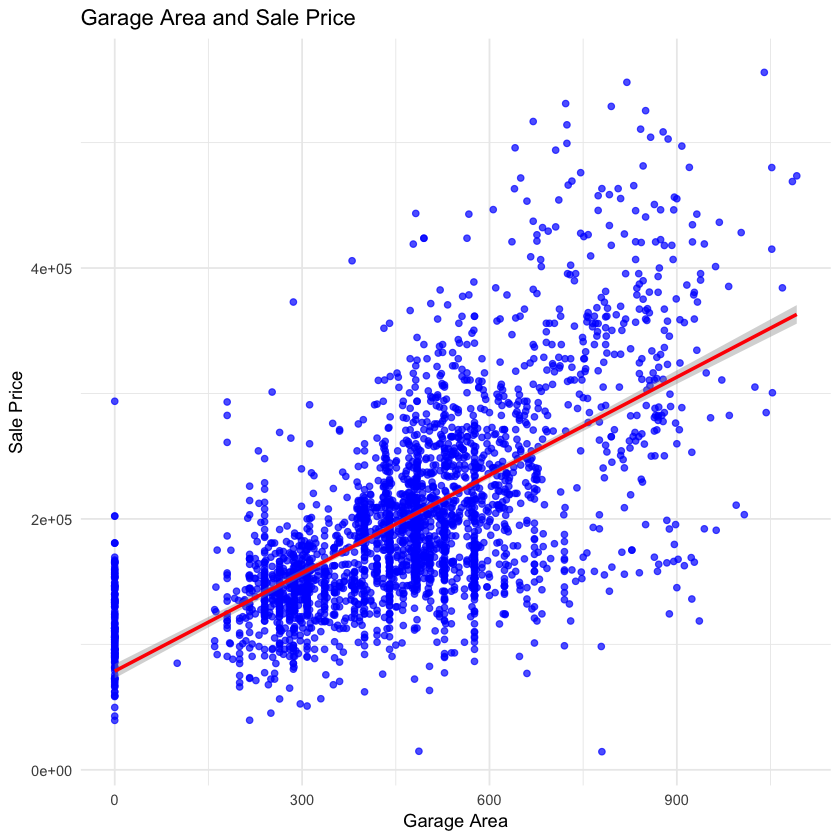

In [23]:
ggplot(data, aes(x = garage_area, y = sale_price)) +
  geom_point(color = "blue", alpha = 0.7) + geom_smooth(method = 'lm', color = "red") +
  
  labs(title = "Garage Area and Sale Price", x = "Garage Area",
       y = "Sale Price") +
  theme_minimal()

house_quality

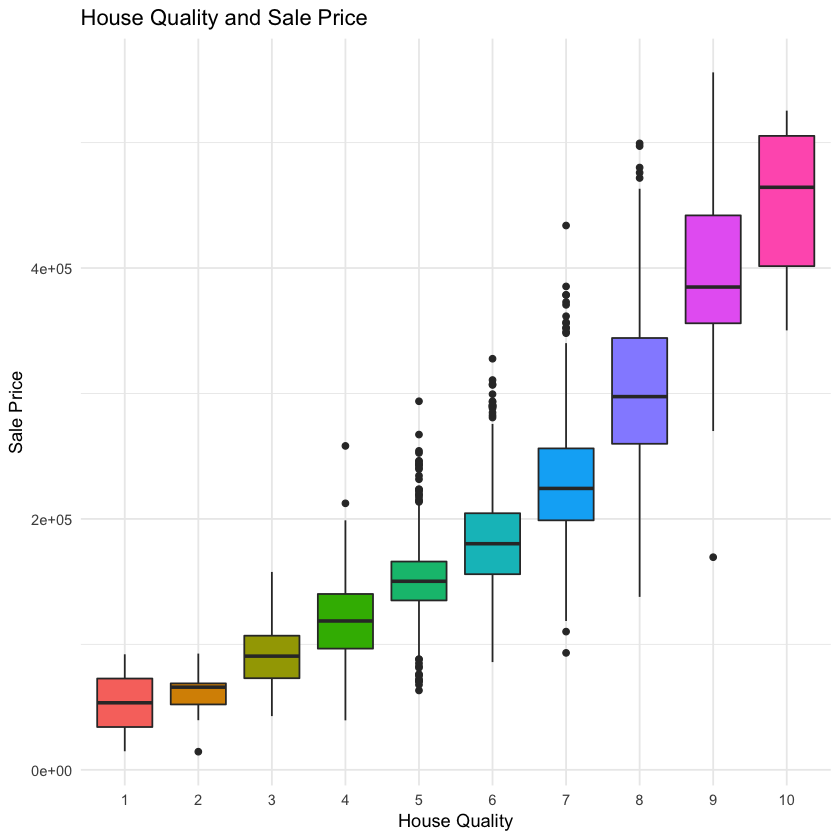

In [24]:
ggplot(data, aes(x = house_quality, y = sale_price, fill = house_quality)) +
  geom_boxplot() +
  labs(title = "House Quality and Sale Price",
       x = "House Quality",
       y = "Sale Price") + theme_minimal() + guides(fill = FALSE)

house age, sale price and house condition

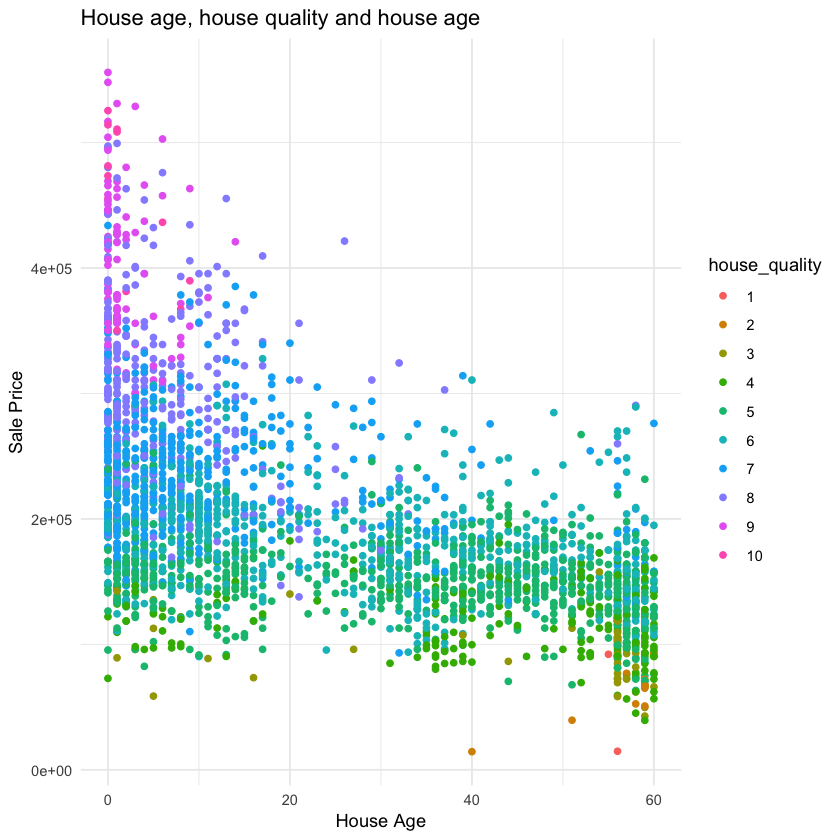

In [25]:
ggplot(data, aes(x = house_age, y = sale_price, color = house_quality)) +
  geom_point() +
  labs(title = "House age, house quality and house age",
       x = "House Age",
       y = "Sale Price") + theme_minimal()


Neighborhood and sale price

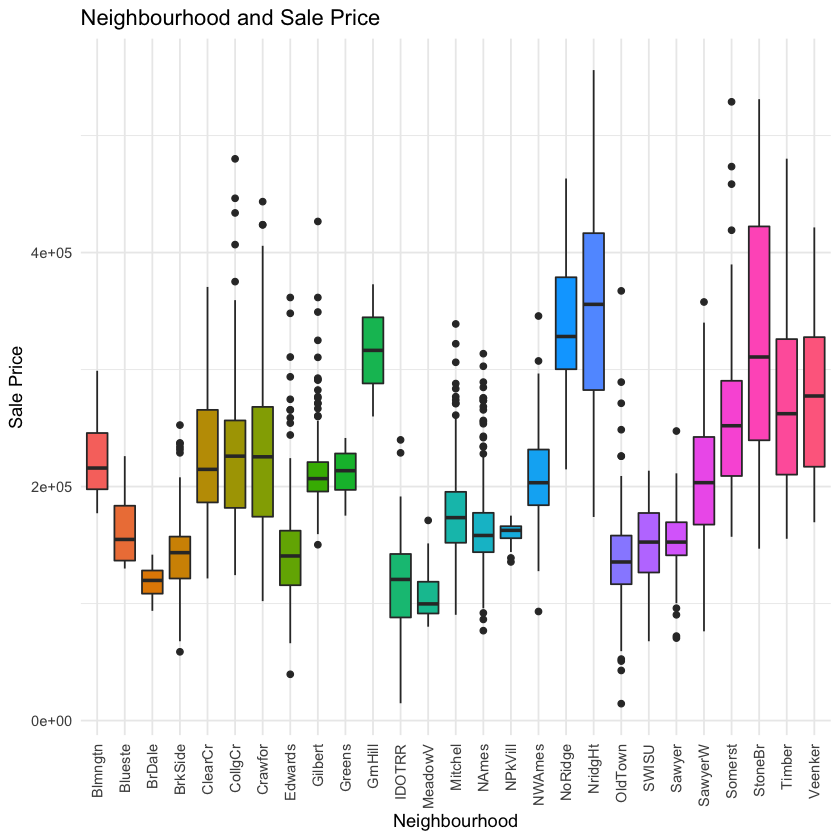

In [26]:
ggplot(data, aes(x = neighbourhood, y = sale_price, fill = neighbourhood)) +
  geom_boxplot() +
  labs(title = "Neighbourhood and Sale Price",
       x = "Neighbourhood",
       y = "Sale Price") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + guides(fill = FALSE)


total_sf and sale price

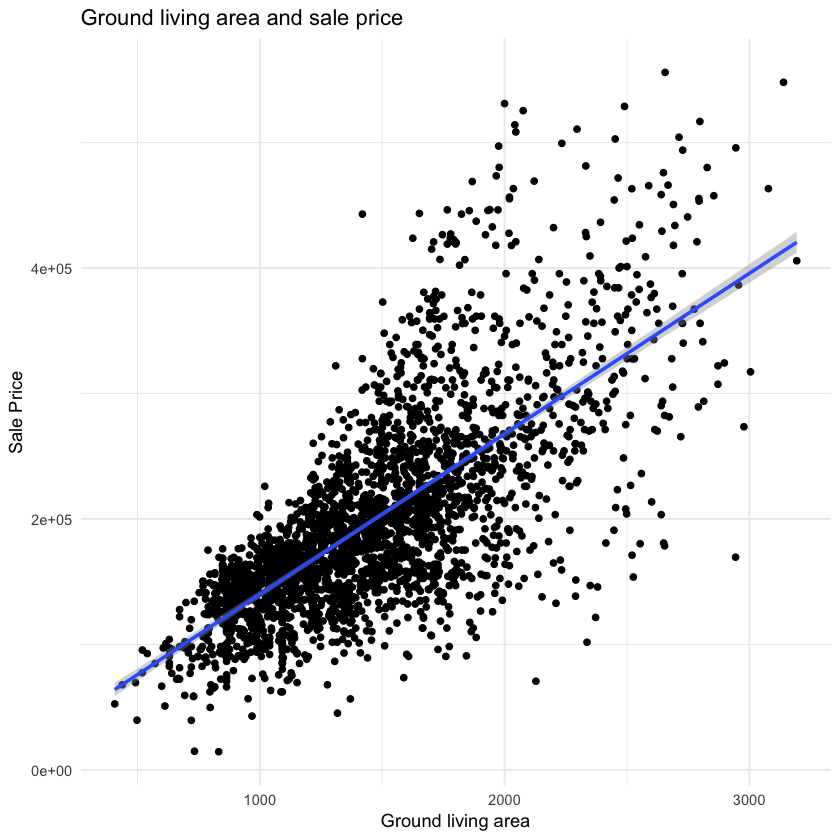

In [27]:
ggplot(data, aes(x = total_sf, y = sale_price)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  labs(title = "Ground living area and sale price",
       x = "Ground living area",
       y = "Sale Price") + theme_minimal()

lot area, sale price and house age

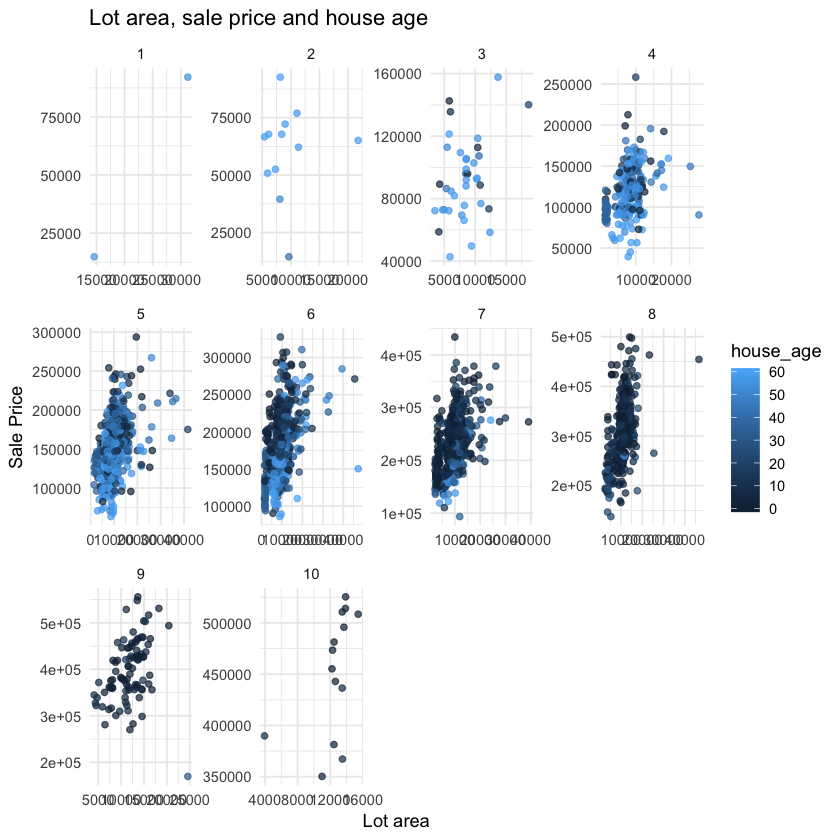

In [28]:
ggplot(data, aes(x = lot_area, y = sale_price, color = house_age)) +
  geom_point(alpha = 0.7) +
  facet_wrap(~ house_quality, scales = "free") + labs(title = "Lot area, sale price and house age",
                                                      x = "Lot area",
                                                      y = "Sale Price") + theme_minimal()

Total rooms and sale price

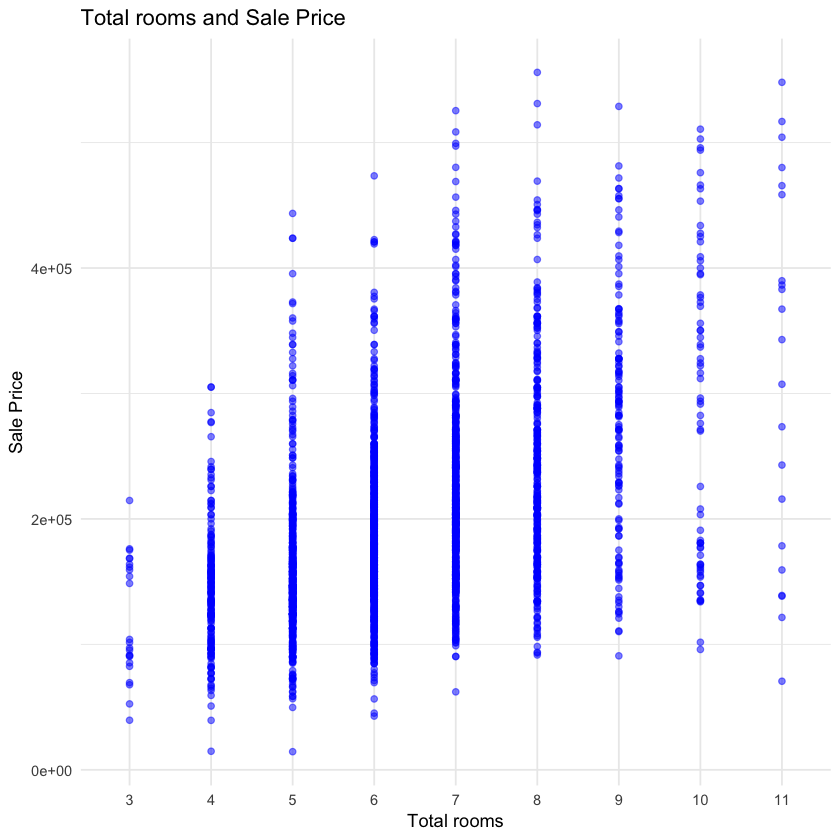

In [29]:
ggplot(data, aes(x = as.factor(rooms_tot), y = sale_price)) +
  geom_point(color = "blue", alpha = 0.5) + labs(title = "Total rooms and Sale Price",
                                                 x = "Total rooms",
                                                 y = "Sale Price") + theme_minimal()

bedroom and sale price

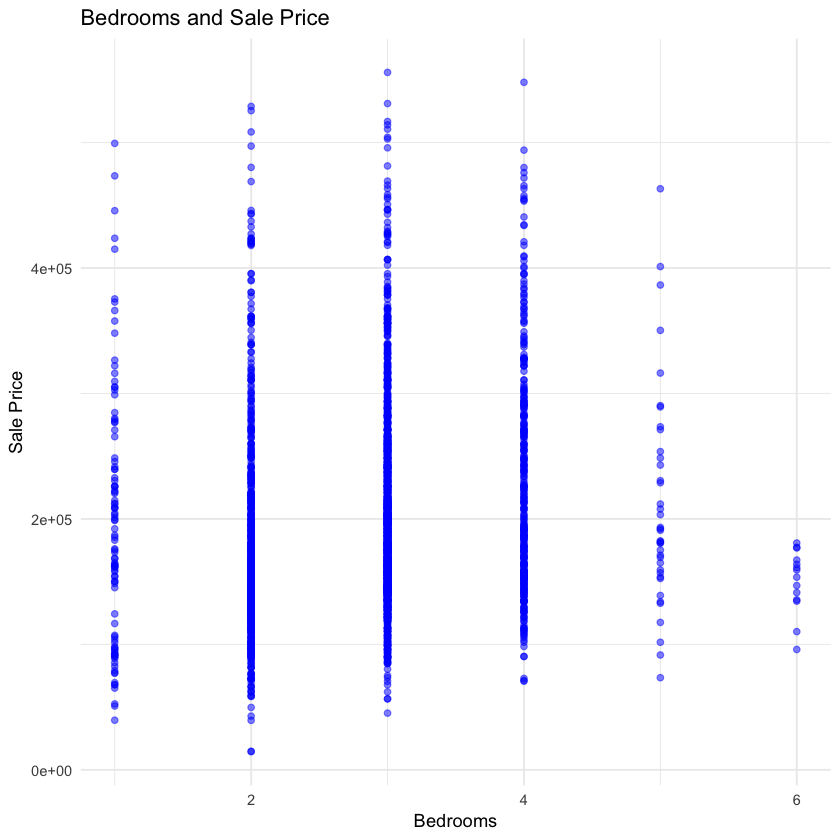

In [30]:
ggplot(data, aes(x = bedroom, y = sale_price)) +
  geom_point(color = "blue", alpha = 0.5) + labs(title = "Bedrooms and Sale Price",
                                                 
                                                 x = "Bedrooms",
                                                 y = "Sale Price") + theme_minimal()


CORRELATION MEASURES

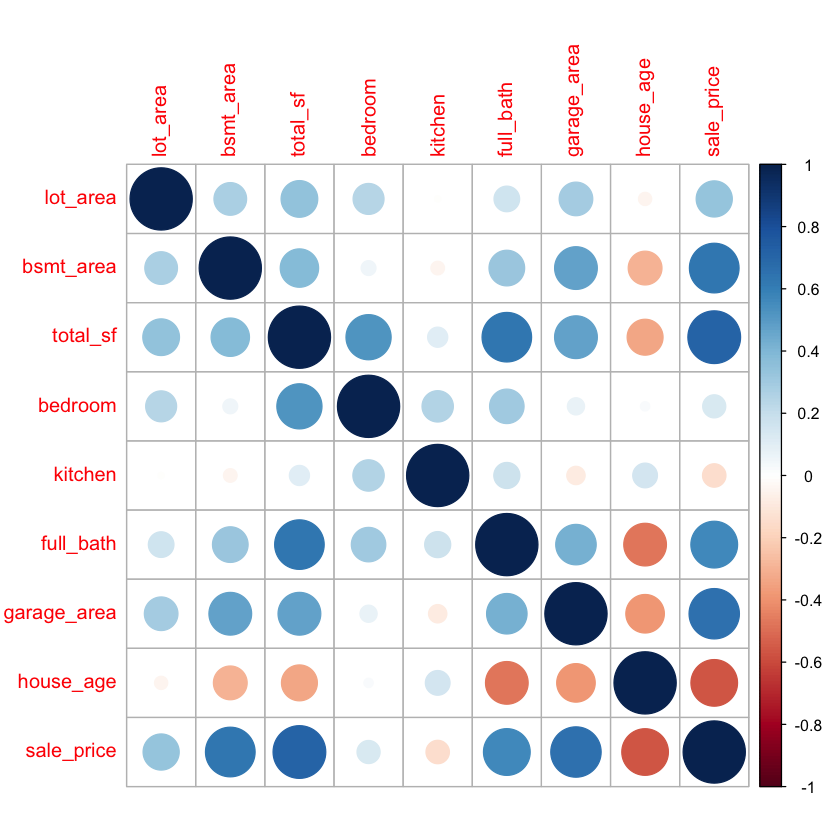

In [31]:
#Pearson correlation numeric variables
data_numeric <- data[sapply(data, is.numeric)] 
correlation_matrix <- cor(data_numeric, use = "complete.obs") 
corrplot(correlation_matrix, method = "circle")


	Pearson's product-moment correlation

data:  data$total_sf and data$sale_price
t = 54.111, df = 2756, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6991294 0.7353499
sample estimates:
      cor 
0.7177248 



	Pearson's product-moment correlation

data:  data$house_age and data$sale_price
t = -35.61, df = 2756, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5863972 -0.5352505
sample estimates:
       cor 
-0.5613597 



	Pearson's product-moment correlation

data:  data$garage_area and data$sale_price
t = 45.505, df = 2756, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6331470 0.6757951
sample estimates:
      cor 
0.6549923 


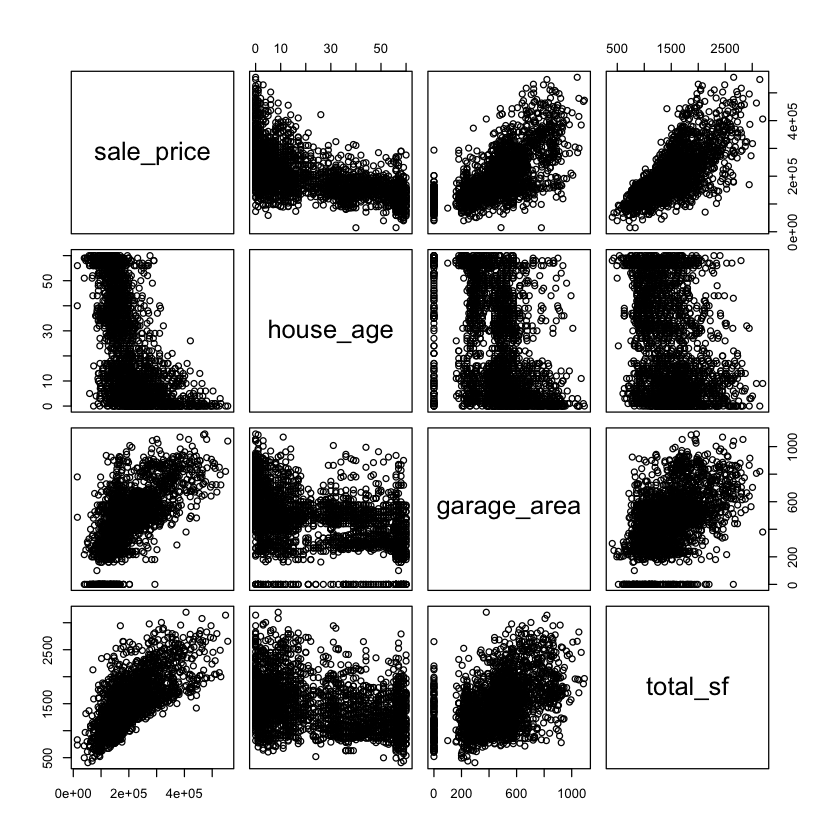

In [32]:
#numeric hypothesis correlation
cor.test(data$total_sf, data$sale_price)
cor.test(data$house_age, data$sale_price) 
cor.test(data$garage_area, data$sale_price)
pairs(data[, c("sale_price", "house_age", "garage_area", "total_sf")])


In [33]:
#categorical hypothesis
anova_result <- aov(sale_price ~ house_quality + neighbourhood, data = data) 
cor.test(data$sale_price, as.numeric(data$house_quality), method = "spearman", exact = FALSE) 
cor.test(data$sale_price, as.numeric(data$neighbourhood), method = "spearman", exact = FALSE)



	Spearman's rank correlation rho

data:  data$sale_price and as.numeric(data$house_quality)
S = 671605581, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8079197 



	Spearman's rank correlation rho

data:  data$sale_price and as.numeric(data$neighbourhood)
S = 2937316231, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1599227 


LINEAR REGRESSION MODEL 

In [34]:
set.seed(40425150)
index <- createDataPartition(data$sale_price, p = 0.8, list = FALSE) 
train <- data[index,]
test <- data[-index, ]

Modeling

In [35]:
model1 <- lm(sale_price ~ total_sf + neighbourhood + house_quality + garage_area + house_age, data = train)
summary(model1)
test$predictions1 <- predict(model1, test)
print(test$predictions1)
postResample(test$predictions1, test$sale_price)


Call:
lm(formula = sale_price ~ total_sf + neighbourhood + house_quality + 
    garage_area + house_age, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-261184  -15541     374   15112  151862 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5770.033  22613.670   0.255 0.798626    
total_sf                 55.557      1.926  28.848  < 2e-16 ***
neighbourhoodBlueste -26868.851  13143.695  -2.044 0.041050 *  
neighbourhoodBrDale  -34127.430   9382.823  -3.637 0.000282 ***
neighbourhoodBrkSide -12681.415   7416.202  -1.710 0.087416 .  
neighbourhoodClearCr  25343.036   8861.214   2.860 0.004277 ** 
neighbourhoodCollgCr   5271.185   6695.556   0.787 0.431212    
neighbourhoodCrawfor  24747.131   7374.077   3.356 0.000805 ***
neighbourhoodEdwards  -9406.482   7125.211  -1.320 0.186918    
neighbourhoodGilbert    745.712   6911.696   0.108 0.914092    
neighbourhoodGreens  -19581.806  15106.426  -1.296 0.195025    
nei

  [1] 236394.33 224372.05 125080.22 136344.64 198752.15 110491.93 192321.09
  [8] 167385.94 143304.04 162672.90 206249.17 145502.59 142058.21 376006.29
 [15] 135565.48 142523.55 227117.55 177656.15 151960.07 113395.08 140614.35
 [22] 230938.86 222312.60 232009.54 161521.17  70872.36 172303.39 117006.81
 [29] 167022.38 177658.44 207615.54 210832.86 181271.14 172834.33  80980.94
 [36] 213363.60 127972.17 233045.10  93299.74 265024.30 130995.09 434869.85
 [43] 108986.61 115404.54 217555.35 146720.30 152723.89 167610.17 333490.32
 [50] 231481.28 284814.27 158680.35 192092.45 236361.39 122476.54 146352.07
 [57]  95400.30 216957.28 220559.17 176214.51 173835.72 220366.08 281530.57
 [64] 202433.49 246230.28 488599.90 177355.20 164738.51 178584.32 352876.47
 [71] 320140.49 295634.81 199151.96 177124.16 141391.06 149509.58 120124.13
 [78] 341824.21 361101.71 221747.39 275540.01 108914.74  72006.61 219112.00
 [85] 131913.00 291382.37 257073.05  89399.74 193462.57 385678.33 166663.38
 [92] 243986

RMSE     Rsquared          MAE 
29055.776118     0.875762 21168.552940

In [36]:
model2 <- lm(sale_price ~ total_sf + neighbourhood + house_quality + garage_area + house_age + d_type + bedroom + bsmt_area, data = train)
summary(model2)
test$predictions2 <- predict(model2, test)
print(test$predictions2)
postResample(test$predictions2, test$sale_price)


Call:
lm(formula = sale_price ~ total_sf + neighbourhood + house_quality + 
    garage_area + house_age + d_type + bedroom + bsmt_area, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-238536  -14106     930   13568  153268 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           30920.730  20262.220   1.526 0.127150    
total_sf                 63.365      2.531  25.035  < 2e-16 ***
neighbourhoodBlueste   -875.786  11835.915  -0.074 0.941022    
neighbourhoodBrDale   -1453.440   9248.392  -0.157 0.875137    
neighbourhoodBrkSide -11662.015   7196.450  -1.621 0.105266    
neighbourhoodClearCr   9400.335   8085.812   1.163 0.245132    
neighbourhoodCollgCr  -6723.538   6285.605  -1.070 0.284887    
neighbourhoodCrawfor  22398.779   6897.343   3.247 0.001182 ** 
neighbourhoodEdwards -12286.933   6690.272  -1.837 0.066416 .  
neighbourhoodGilbert  -8044.638   6607.600  -1.217 0.223554    
neighbourhoodGreens   -6971.825  133

  [1] 244199.00 205043.90 130976.35 143050.64 201277.21 111463.90 193473.02
  [8] 180628.17 142019.46 184803.56 184045.44 149606.98 148313.34 383790.15
 [15] 128858.55 139965.21 245816.55 187902.69 147271.59 118129.41 127623.18
 [22] 240393.91 242566.11 234579.16 168729.45  69899.08 205230.36 125286.50
 [29] 179760.51 147624.53 192820.65 218715.03 204008.99 186057.62 112982.72
 [36] 238519.42 157661.89 240443.68  84244.67 237154.57 133857.35 443262.33
 [43] 119281.15 115154.87 222168.42 172756.96 131262.66 161287.86 345386.22
 [50] 220994.65 275119.61 163925.56 180215.83 231678.43 121523.91 134738.00
 [57]  98839.94 236679.43 229566.32 183479.52 170920.54 207810.15 299321.53
 [64] 162342.29 253130.48 511025.77 218036.57 162258.84 183687.16 336227.63
 [71] 320809.46 291865.91 188886.78 186620.79 147420.19 153608.41 117760.75
 [78] 364153.56 346871.58 181005.62 289980.14  97088.94  88306.31 222509.17
 [85] 143416.00 289313.15 230432.12  83780.07 189955.49 389720.40 171244.52
 [92] 241417

RMSE     Rsquared          MAE 
2.634514e+04 8.975308e-01 1.906202e+04

In [37]:
model3 <- lm(sale_price ~ total_sf + neighbourhood + house_quality + garage_area + house_age + kitchen + bsmt_area + fireplace + external_qual, data = train)
summary(model3)
test$predictions3 <- predict(model3, test)
print(test$predictions3)
postResample(test$predictions3, test$sale_price)


Call:
lm(formula = sale_price ~ total_sf + neighbourhood + house_quality + 
    garage_area + house_age + kitchen + bsmt_area + fireplace + 
    external_qual, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-209750  -13762     739   14107  143344 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           68307.016  20952.857   3.260 0.001131 ** 
total_sf                 54.937      1.859  29.550  < 2e-16 ***
neighbourhoodBlueste  -6539.125  11749.859  -0.557 0.577908    
neighbourhoodBrDale  -10991.106   8523.134  -1.290 0.197341    
neighbourhoodBrkSide  -2694.047   6707.051  -0.402 0.687964    
neighbourhoodClearCr  23384.998   7983.469   2.929 0.003434 ** 
neighbourhoodCollgCr  12501.219   6001.448   2.083 0.037365 *  
neighbourhoodCrawfor  27882.339   6656.619   4.189 2.92e-05 ***
neighbourhoodEdwards   -345.755   6437.171  -0.054 0.957169    
neighbourhoodGilbert  12368.705   6204.530   1.993 0.046333 *  
neighbourhoo

  [1] 226122.30 200407.19 121331.00 140065.89 203449.98 118485.91 195817.28
  [8] 173227.30 136396.23 164982.44 200453.54 155233.92 145202.12 394566.05
 [15] 142954.75 141127.85 249355.35 202282.84 146795.03 116637.34 146919.50
 [22] 225235.33 231835.95 222821.83 169321.90  74551.89 179430.45 120399.05
 [29] 171760.37 158014.66 205305.49 213455.58 182371.47 185154.86 105239.92
 [36] 239481.36 136090.35 235989.28  70505.09 253713.93 131815.91 424466.10
 [43] 113921.44 108932.73 207938.95 155524.76 142340.62 139996.95 338026.17
 [50] 231943.34 284495.22 149652.44 179857.37 239478.12 118460.57 138150.16
 [57]  97116.69 223464.25 230653.29 186785.96 164330.06 196944.84 289624.69
 [64] 183324.17 236465.37 504840.14 212857.43 163598.32 169867.44 313345.34
 [71] 308223.83 288771.91 195147.76 195158.28 141863.75 146815.51 120528.28
 [78] 356964.45 357375.67 207585.42 284815.16 106035.53  90898.98 224974.33
 [85] 139513.26 296497.23 233592.34  84434.44 192847.23 376820.33 185608.76
 [92] 241280

RMSE     Rsquared          MAE 
2.639784e+04 8.973588e-01 1.933955e+04


Call:
lm(formula = sale_price ~ total_sf + neighbourhood + house_quality + 
    garage_area + house_age + d_type + bsmt_area + bedroom + 
    fireplace + heat_qual + external_qual, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-210550  -13245     379   13295  143984 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           80470.954  22974.704   3.503 0.000470 ***
total_sf                 58.947      2.578  22.866  < 2e-16 ***
neighbourhoodBlueste   3878.757  11575.356   0.335 0.737592    
neighbourhoodBrDale    4700.115   9068.357   0.518 0.604304    
neighbourhoodBrkSide -10996.822   7026.717  -1.565 0.117730    
neighbourhoodClearCr   7834.174   7918.277   0.989 0.322590    
neighbourhoodCollgCr  -5275.062   6133.275  -0.860 0.389845    
neighbourhoodCrawfor  20407.266   6740.638   3.027 0.002495 ** 
neighbourhoodEdwards -11401.104   6531.421  -1.746 0.081028 .  
neighbourhoodGilbert  -8208.454   6433.455  -1.276 0.20

  [1] 232172.87 201493.28 129843.99 141589.24 207728.93 110664.23 199165.29
  [8] 167930.74 138857.03 183139.08 185126.77 151774.71 150113.74 397651.81
 [15] 129538.05 135269.70 245663.03 199321.82 141124.86 115495.81 123458.70
 [22] 241544.32 240803.80 234409.72 179909.34  73113.00 201624.97 129122.96
 [29] 179839.69 145472.88 190456.38 217627.50 199357.69 184471.53 103098.04
 [36] 250389.64 158737.38 239041.01  86031.22 228420.46 137060.34 435027.90
 [43] 116009.16 117732.75 217417.06 171941.84 131257.33 158997.61 341588.81
 [50] 210388.32 277129.15 155195.29 176714.47 231098.48 120286.13 138619.12
 [57]  96795.64 235351.13 237716.51 180622.93 163812.55 206406.46 291707.58
 [64] 163073.06 251241.57 505971.45 231832.93 167248.18 178220.72 328250.73
 [71] 318748.94 292739.24 197001.85 188496.69 150911.22 148211.30 106473.00
 [78] 361627.91 347432.19 181130.23 293615.10 100468.07  84479.82 222472.92
 [85] 150689.20 290278.33 230470.01  83865.69 183793.57 384315.30 195152.57
 [92] 245350

RMSE     Rsquared          MAE 
2.525051e+04 9.061315e-01 1.837751e+04

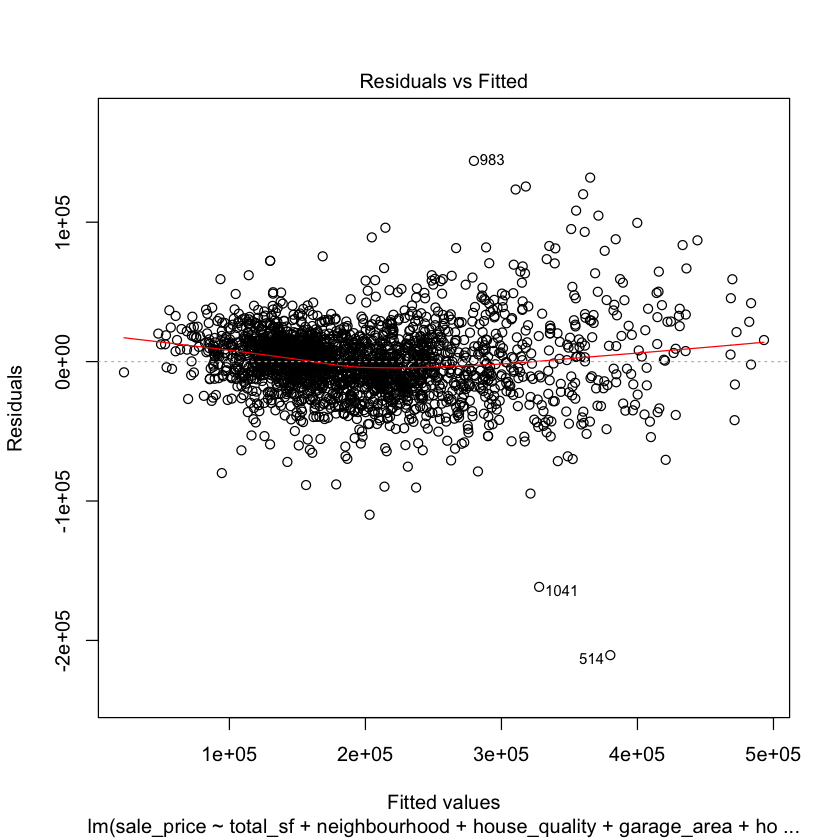

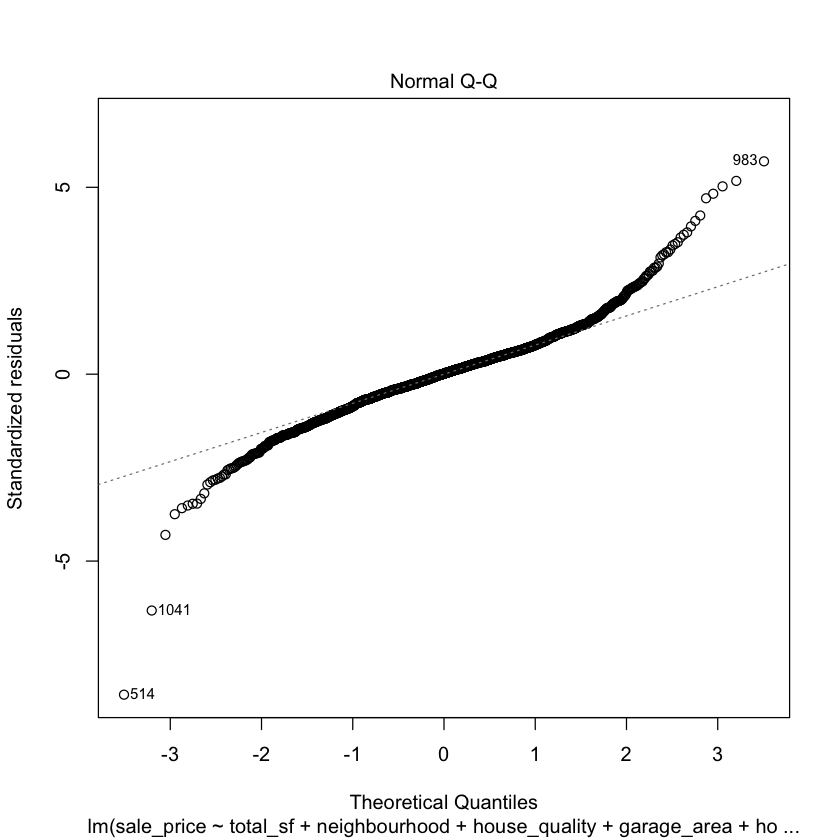

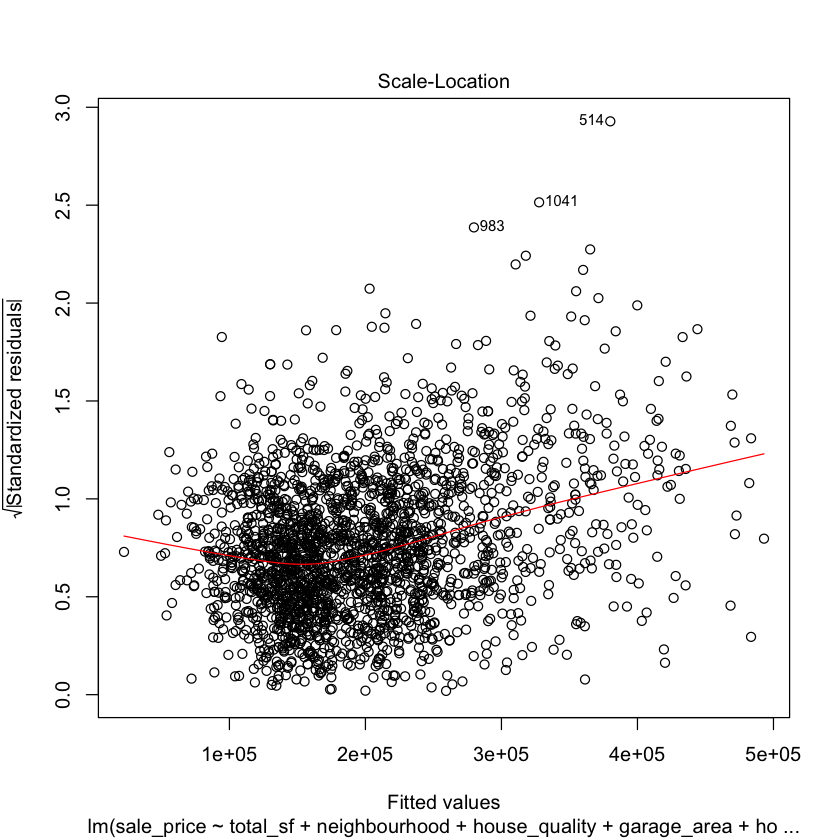

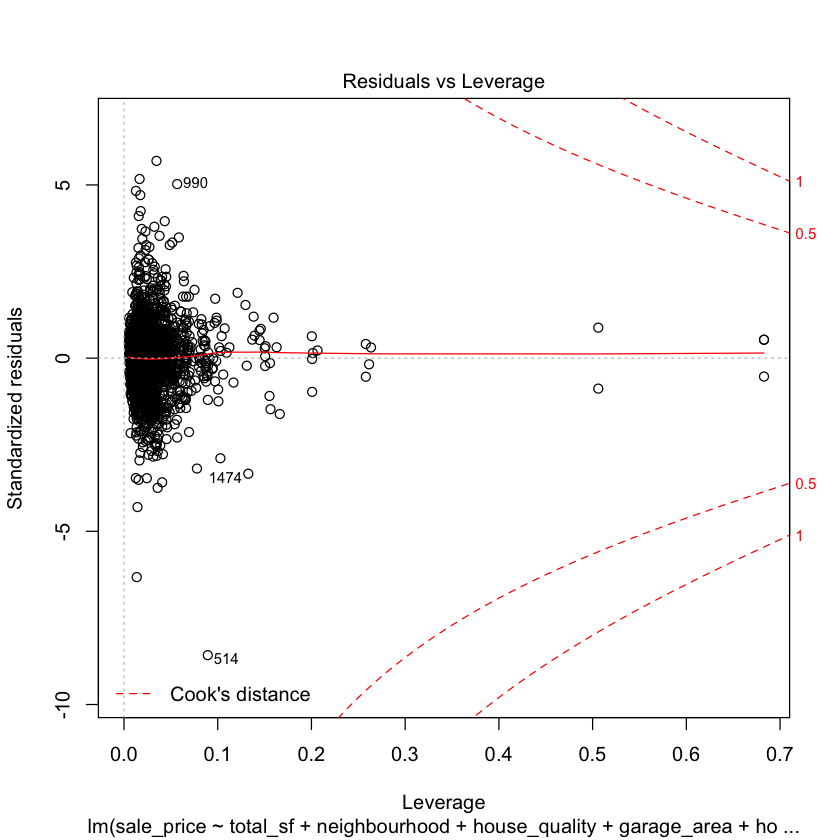

In [38]:
model4 <- lm(sale_price ~ total_sf + neighbourhood + house_quality + garage_area + house_age + d_type + bsmt_area + bedroom + fireplace + heat_qual + external_qual, data=train)
summary(model4)
test$predictions4 <- predict(model4, test) 
print(test$predictions4) 
postResample(test$predictions4, test$sale_price) 
plot(model4)

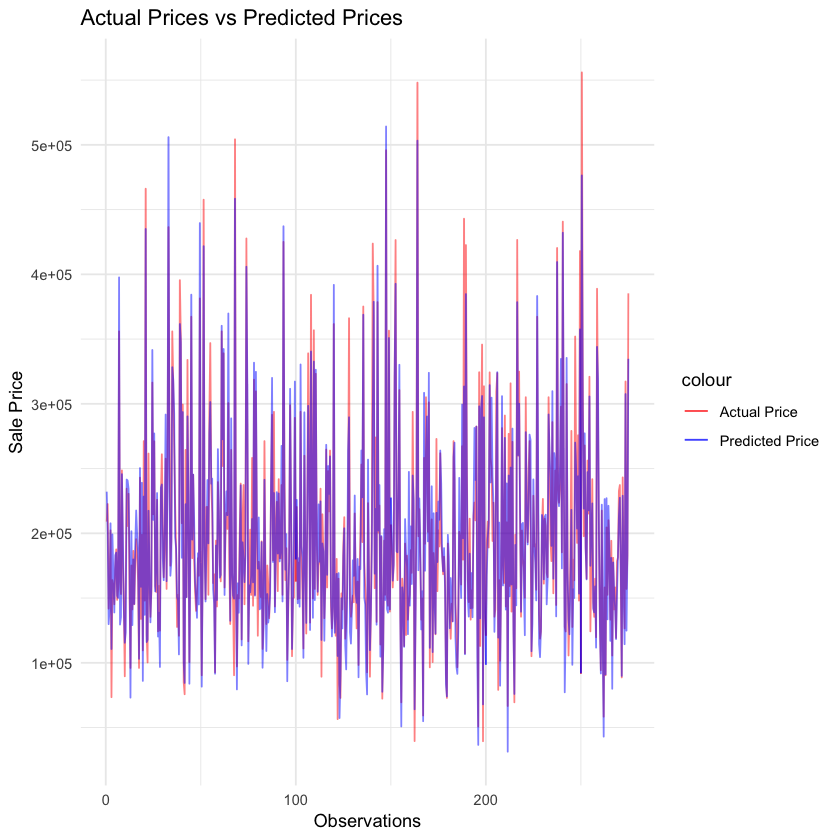

In [41]:
#line chart actual values vs predicted values with half of the test dataset for increased clarity ggplot(test, aes(x = seq_along(sale_price)/2)) +
ggplot(test, aes(x = seq_along(sale_price)/2)) +
  geom_line(aes(y = sale_price, color = "Actual Price"), alpha = 0.5, size = 0.5) + 
  geom_line(aes(y = predictions4, color = "Predicted Price"), alpha = 0.5, size = 0.5) + 
  labs(title = "Actual Prices vs Predicted Prices",
  x = "Observations",
  y = "Sale Price") +
  scale_color_manual(values = c("Actual Price" = "red", "Predicted Price" = "blue")) + 
  theme_minimal()


[1] 106

sale_price,total_sf,neighbourhood,house_quality,garage_area,house_age,d_type,bsmt_area,bedroom,fireplace,heat_qual,external_qual
516802,2798,StoneBr,9,670,0,60,1398,3,1,Ex,Gd
270070,1800,CollgCr,9,702,2,20,1800,2,0,Ex,Gd
310750,1698,NridgHt,9,730,5,20,1698,3,1,Ex,Gd
151307,2291,OldTown,6,506,9,190,1214,4,1,Ex,TA
528840,2490,Somerst,9,795,3,20,2458,2,2,Ex,Ex
406800,2140,CollgCr,8,894,0,20,2140,3,0,Ex,Gd
265550,2009,Edwards,6,795,56,70,672,4,2,Ex,TA
405783,3194,Crawfor,8,380,9,70,965,4,2,TA,TA
420814,1710,NridgHt,8,866,0,20,1710,2,1,Ex,Gd
446350,1973,NridgHt,8,895,1,20,1935,3,1,Gd,Gd


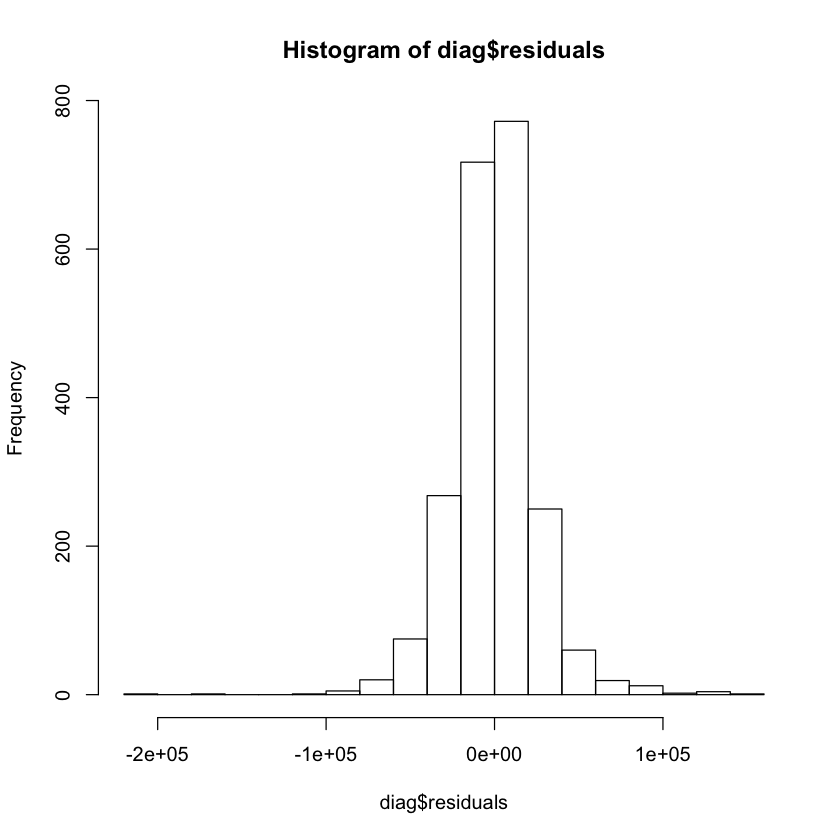

In [42]:
#residuals examination. 105 standardised residuals
diag <- train
diag$residuals <- resid(model4)
diag$standar_residuals <- rstandard(model4)
diag$large_residuals <- diag$standar_residuals > 2 | diag$standar_residuals < -2 
sum(diag$large_residuals)
diag_investigate <- diag[diag$large_residuals, c("sale_price", "total_sf", "neighbourhood", "house_quality", "garage_area", "house_age", "d_type", "bsmt_area", "bedroom", "fireplace", "heat_qual", "external_qual")]
diag_investigate 
hist(diag$residuals)